In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
covid_data = pd.read_csv('./experiment/data/Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv')
pop_density_data = pd.read_excel('./experiment/data/Kepadatan Penduduk menurut Provinsi.xlsx')
population_data = pd.read_excel('./experiment/data/Jumlah Penduduk.xlsx')

print(covid_data.head())
print(pop_density_data.head())
print(population_data.head())


   Object_ID                   Provinsi                 Tanggal  \
0        1.0                       Aceh  2020/03/02 00:00:00+00   
1        2.0                       Bali  2020/03/02 00:00:00+00   
2        3.0                     Banten  2020/03/02 00:00:00+00   
3        4.0  Kepulauan Bangka Belitung  2020/03/02 00:00:00+00   
4        5.0                   Bengkulu  2020/03/02 00:00:00+00   

   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Kasus_Sembuh_Akumulatif  Penambahan_Harian_Kasus_Sembuh  \
0                      0.0                             0.0   
1                      0.0                          

In [34]:
data = covid_data.merge(pop_density_data, on='Provinsi').merge(population_data, on='Provinsi')
print(data)

     Object_ID Provinsi                 Tanggal  \
0          NaN      NaN  1970/01/01 00:00:00+00   
1          NaN      NaN  1970/01/01 00:00:00+00   
2          NaN      NaN  1970/01/01 00:00:00+00   
3          NaN      NaN  1970/01/01 00:00:00+00   
4          NaN      NaN  1970/01/01 00:00:00+00   
..         ...      ...                     ...   
205        NaN      NaN  1970/01/01 00:00:00+00   
206        NaN      NaN  1970/01/01 00:00:00+00   
207        NaN      NaN  1970/01/01 00:00:00+00   
208        NaN      NaN  1970/01/01 00:00:00+00   
209        NaN      NaN  1970/01/01 00:00:00+00   

     Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                          

In [35]:
correlation_matrix = data[['Jumlah_Kasus_Harian', 'Kepadatan_Penduduk', 'Jumlah_Penduduk']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

KeyError: "None of [Index(['Jumlah_Kasus_Harian', 'Kepadatan_Penduduk', 'Jumlah_Penduduk'], dtype='object')] are in the [columns]"

In [8]:
features = data[['Jumlah_Kasus_Harian', 'Kepadatan_Penduduk', 'Jumlah_Penduduk']]
features = features.dropna()

NameError: name 'features' is not defined

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

NameError: name 'features' is not defined

In [26]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

NameError: name 'scaled_features' is not defined

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

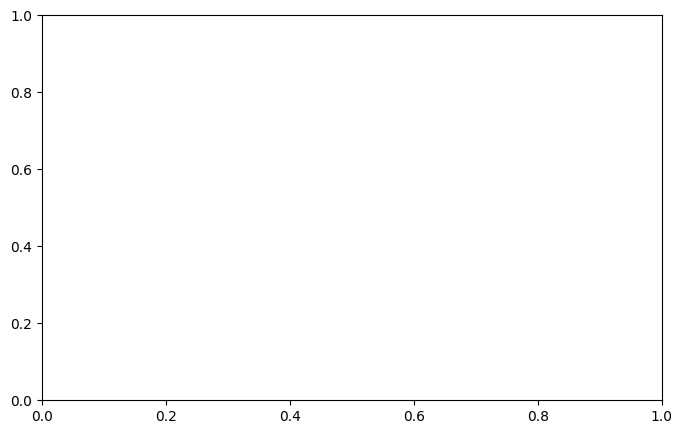

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [29]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

NameError: name 'scaled_features' is not defined

In [30]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

KeyError: 'Cluster'

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
for cluster in range(k_optimal):
    cluster_data = pca_features[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Clustering Visualization with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


NameError: name 'scaled_features' is not defined

<Figure size 800x600 with 0 Axes>

In [31]:
sns.pairplot(data, hue='Cluster', vars=['Jumlah_Kasus_Harian', 'Kepadatan_Penduduk', 'Jumlah_Penduduk'], palette='bright')
plt.show()


NameError: name 'sns' is not defined